# Final Project: Student Sleep Pattern Analysis and Recommendation System
In this project, the work is organized into four main phases. Phase 1, Dataset selection and preprocessing, focuses on choosing the Student Sleep Patterns dataset, exploring its structure, cleaning it, and applying all preprocessing steps needed to prepare it for modeling. Phase 2, Supervised learning, develops and evaluates classification models that predict students’ sleep quality based on their academic and lifestyle features. Phase 3, Unsupervised learning, applies clustering techniques to discover hidden groups of students with similar sleep-related behaviors and interprets these patterns. Phase 4, Integrate Generative AI, uses the processed data together with Generative AI (LLaMA via the Groq API) to generate personalized sleep recommendations, compare different prompt templates, and select the most effective one for the system.
# Phase 1: Problem Understanding and Data Exploration
In this phase, the dataset was selected, explored, and prepared for further analysis. The main objective was to understand the problem, examine the data characteristics, and apply essential preprocessing steps to ensure the dataset is clean, consistent, and ready for machine learning in the upcoming phases.
## 1. Introduction
Many university students experience irregular sleep schedules due to study pressure, extended screen time, and unhealthy daily habits.  
Lack of proper sleep can affect focus, productivity, and overall mental and physical well-being. This project aims to study the factors that influence students’ sleep quality by analyzing real data and discovering patterns that connect lifestyle behaviors with sleep outcomes. Understanding these patterns can help raise awareness among students and encourage healthier academic and personal routines.



### 1.1 Problem Definition
Students often struggle to maintain a consistent and healthy sleep schedule because of academic workload, high stress levels, and technology usage late at night.These behaviors lead to poor sleep quality, fatigue, and reduced academic performance. The problem addressed in this project is the lack of understanding of how different lifestyle factors such as study hours, caffeine intake, and physical activity interact and influence sleep quality. By analyzing these relationships, the project seeks to highlight the main contributors to irregular sleep among university students.



### 1.2 Project Scope
* Data Understanding: Using a real-world dataset that contains students’ lifestyle and academic factors such as study hours, screen time, caffeine intake, and physical activity.  
* Data Preprocessing: Handling missing values, verifying data consistency, and preparing the dataset for analysis.  
* Exploratory Data Analysis: Exploring patterns and relationships between different variables to understand how lifestyle habits impact sleep quality.  
* Visualization and Insights: Creating charts and statistical summaries to present findings about students’ sleep behaviors.  
* Sleep Quality Prediction: Building a simple predictive framework that estimates or classifies sleep quality based on lifestyle and academic factors.  
* Future Work: Expanding the system to provide personalized recommendations for improving sleep habits.

---


## 2. Dataset Goal & Source

### 2.1 Dataset Goal
The Student Sleep Patterns dataset is designed to analyze and predict how academic and lifestyle factors affect students’ sleep quality and duration. It includes information such as study hours, screen time, caffeine intake, stress levels, and physical activity, allowing the exploration of correlations between daily habits and sleep quality. The dataset supports modeling and prediction to identify key factors that influence healthy and balanced sleep routines among university students.

### 2.2 Dataset Source
The dataset was obtained from a public Kaggle source titled *“Student Sleep Patterns Dataset”* created by Arsalan Jamal.  
It provides real-world information about students’ demographics, study habits, screen time, caffeine intake, physical activity, and sleep quality.  
[https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns](https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns)

---


## 3. General Information
### 3.1 Number of Observations and Features

In [ ]:
import pandas as pd
df = pd.read_csv("Dataset/student_sleep_patterns.csv")
num_observations, num_features = df.shape
print(f"Number of observations (students): {num_observations}")
print(f"Number of features (columns): {num_features}")
print("\nList of features:")
for col in df.columns:
    print(f"- {col}")

Number of observations (students): 500
Number of features (columns): 14

List of features:
- Student_ID
- Age
- Gender
- University_Year
- Sleep_Duration
- Study_Hours
- Screen_Time
- Caffeine_Intake
- Physical_Activity
- Sleep_Quality
- Weekday_Sleep_Start
- Weekend_Sleep_Start
- Weekday_Sleep_End
- Weekend_Sleep_End


The dataset contains **500 observations** (students) and **14 features** describing various aspects of students' habits and sleep patterns.  

Below is the detailed description of each feature:

1. **Student_ID** – Unique identifier for each student record.  
2. **Age** – Student’s age in years.  
3. **Gender** – Student’s gender (Male, Female, or Other).  
4. **University_Year** – Academic year of the student (1st, 2nd, 3rd, or 4th year).  
5. **Sleep_Duration** – Average number of sleep hours per night.  
6. **Study_Hours** – Average number of study hours per day.  
7. **Screen_Time** – Average daily screen exposure (in hours).  
8. **Caffeine_Intake** – Number of caffeine servings consumed per day (e.g., coffee, tea, or energy drinks).  
9. **Physical_Activity** – Average minutes spent on physical activity per day.  
10. **Sleep_Quality** – Target variable representing sleep quality on a scale from 1 to 10 (higher values indicate better quality).  
11. **Weekday_Sleep_Start** – Average bedtime during weekdays.  
12. **Weekday_Sleep_End** – Average wake-up time during weekdays.  
13. **Weekend_Sleep_Start** – Average bedtime during weekends.  
14. **Weekend_Sleep_End** – Average wake-up time during weekends.
---


### 3.2 Data Types

In [ ]:
import pandas as pd
df = pd.read_csv("Dataset/student_sleep_patterns.csv")

display(
    pd.DataFrame({
        "Feature_Name": df.dtypes.index,
        "Data_Type": df.dtypes.values
    }).style.hide(axis="index")
)

Feature_Name,Data_Type
Student_ID,int64
Age,int64
Gender,object
University_Year,object
Sleep_Duration,float64
Study_Hours,float64
Screen_Time,float64
Caffeine_Intake,int64
Physical_Activity,int64
Sleep_Quality,int64


The dataset contains both **numerical** and **categorical** data types.

1. **Numerical Features (int64 / float64):**  
  `Age`, `Sleep_Duration`, `Study_Hours`, `Screen_Time`, `Caffeine_Intake`, `Physical_Activity`,  
  `Sleep_Quality`, `Weekday_Sleep_Start`, `Weekday_Sleep_End`, `Weekend_Sleep_Start`, `Weekend_Sleep_End`

2. **Categorical Features (object):**  
  `Gender`, `University_Year`

3. **Identifier:**  
  `Student_ID` — a unique identifier for each record that doesn’t affect prediction.
  ---



### 3.3 Target Variable Description
The target variable in this dataset is Sleep_Quality, which represents each student’s overall sleep quality score on a scale from 1 to 10.
The table below illustrates the distribution of these scores across all participants. It can be observed that sleep quality levels are relatively balanced, indicating a diverse range of sleep behaviors among students.

In [ ]:
import pandas as pd
df = pd.read_csv("Dataset/student_sleep_patterns.csv")

table = pd.DataFrame({
    "Sleep_Quality_Level": sorted(df["Sleep_Quality"].unique()),
    "Number_of_Students": df["Sleep_Quality"].value_counts().sort_index().values
})

display(table.style.hide(axis="index"))

Sleep_Quality_Level,Number_of_Students
1,66
2,46
3,54
4,46
5,41
6,57
7,45
8,40
9,55
10,50


The table above presents the distribution of the **Sleep_Quality** variable.  
The **Sleep_Quality_Level** column shows the sleep quality scores ranging from **1 to 10**,  
and the **Number_of_Students** column indicates how many students fall into each score.

---


### 3.4 Summary & Visualization
#### 3.4.1 Statistical Summary

In [ ]:
df.drop(columns=['Student_ID']).describe()

,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


This table displays the statistical summary for all numerical features in the dataset, excluding `Student_ID`, `Gender`, and `University_Year`.  
The categorical columns were not included because they are non-numeric.  

From this summary:
1. The average student age is around **21.5 years**, ranging between **18 and 25**.  
2. The average **Sleep Duration** is approximately **6.5 hours**, while **Study Hours** average around **6 hours per day**.  
3. The **Screen Time** mean is about **2.5 hours**, and **Caffeine Intake** averages **2 to 3 cups per day**.  
4. **Physical Activity** levels vary widely, indicating differences in lifestyle habits.  
5. **Sleep Quality** ranges from **1 to 10**, showing a broad spread across different students.
6. The **Weekday_Sleep_Start** values range generally from **19.0 to 23.0 hours**, with an **average near 21.0 (≈ 9:00 PM)**.  
7. On weekends, the **Weekend_Sleep_Start** values often fall between **0.0 and 3.5 hours**, averaging around **0.5–1.0 (≈ 12:30 AM)** — showing that students go to bed about **2 hours later on weekends**.  
8. The **Weekday_Sleep_End** values cluster between **6.0 and 8.0 hours (≈ 6:00–8:00 AM)**
9. On **Weekend_Sleep_End** extends between **8.5 and 10.5 hours (≈ 8:30–10:30 AM)**, meaning students **wake up around 2 hours later on weekends**.

---


#### 3.4.2 Variable Distributions Visualization

In [ ]:
import pandas as pd

df = pd.read_csv("Dataset/student_sleep_patterns.csv")

df.head()


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print("Columns:", list(df.columns))


Columns: ['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']


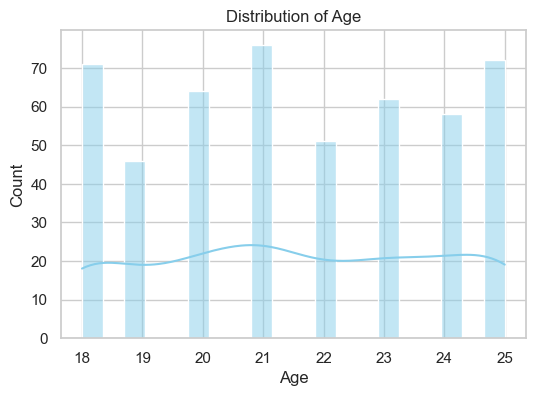

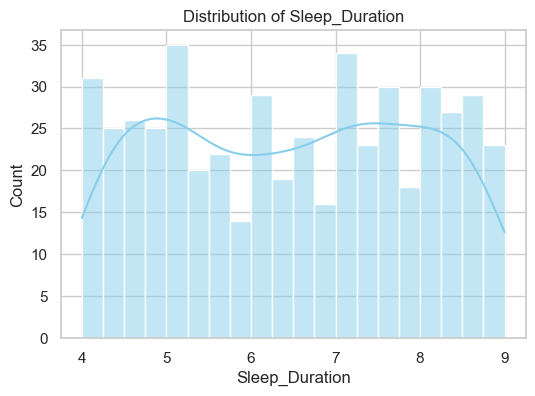

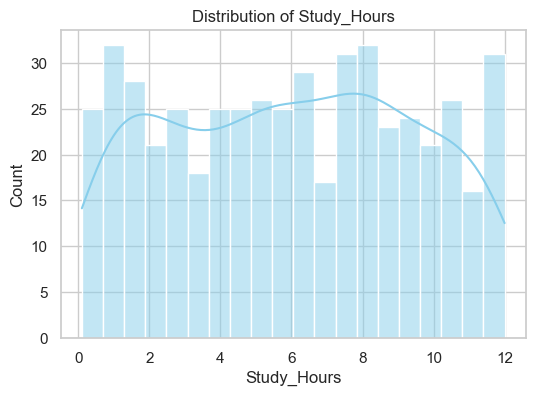

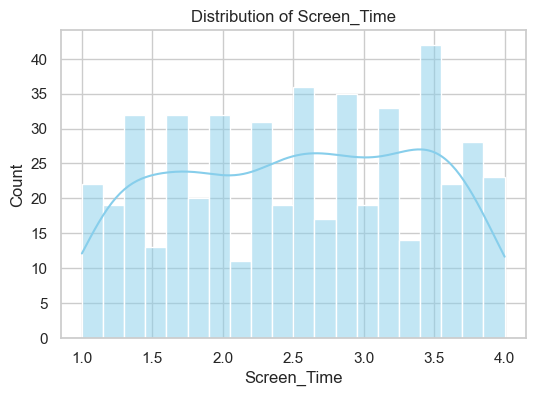

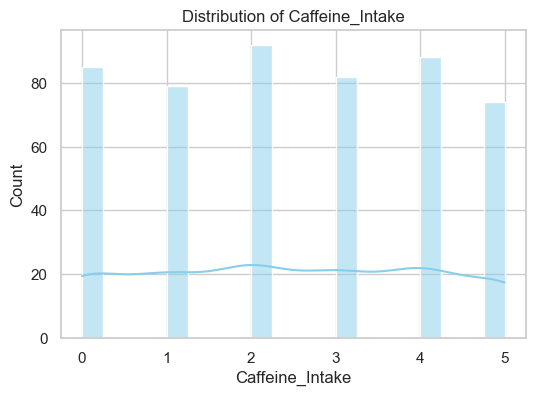

In [ ]:
numeric_cols = ['Age', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

- Most students study between 2 to 6 hours per day.  
- Sleep duration is centered around 6–8 hours, showing a healthy sleep pattern.  
- Screen time tends to be high among students, which may affect their sleep quality.  
- Caffeine intake is relatively low overall, but a few students consume high amounts.

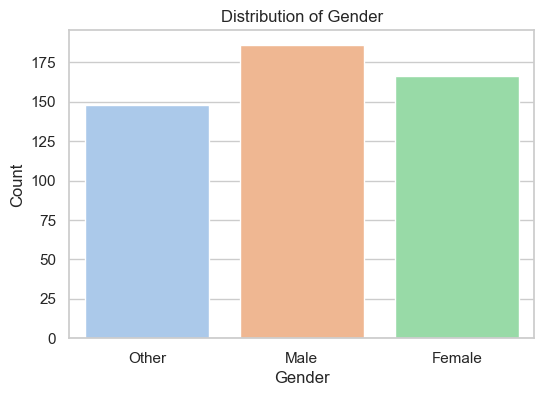

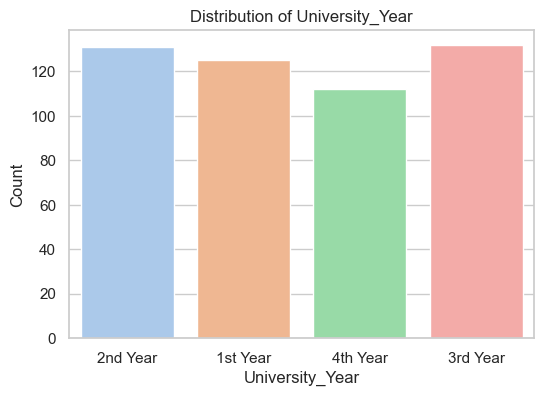

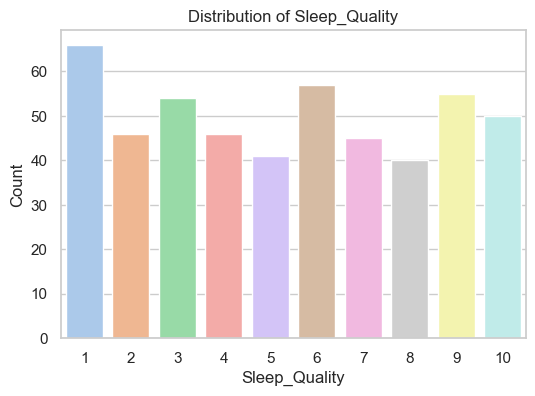

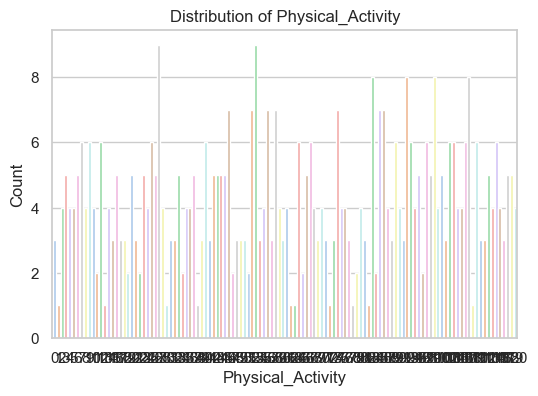

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # لإخفاء التحذيرات

categorical_cols = ['Gender', 'University_Year', 'Sleep_Quality', 'Physical_Activity']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


From these categorical visualizations, we can observe that:
- The Gender distribution is relatively balanced across the dataset.  
- Most students are in their 3rd or 4th year of university.  
- Sleep quality is mostly moderate, indicating an average sleep pattern among students.  
- Physical activity levels vary, but many students report moderate engagement.

---

#### 3.4.3 Missing Value Analysis
Missing Values Analysis is essential to ensure data completeness and accuracy. Missing entries can affect analysis results and lead to biased conclusions. In the Student Sleep Patterns dataset, each attribute was checked for null or empty values. The analysis revealed no missing data, indicating that the dataset is fully complete and ready for further analysis.

In [ ]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100


missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

missing_df

,Missing Values,Percentage
Student_ID,0,0.0
Age,0,0.0
Gender,0,0.0
University_Year,0,0.0
Sleep_Duration,0,0.0
Study_Hours,0,0.0
Screen_Time,0,0.0
Caffeine_Intake,0,0.0
Physical_Activity,0,0.0
Sleep_Quality,0,0.0


All dataset columns show 0% missing values which mean the dataset clean,complete and ready for analysis with no missing value handling required.

---

#### 3.4.4 Class Imbalance


Class distribution for 'Gender':
Gender
Male      186
Female    166
Other     148
Name: count, dtype: int64
----------------------------------------


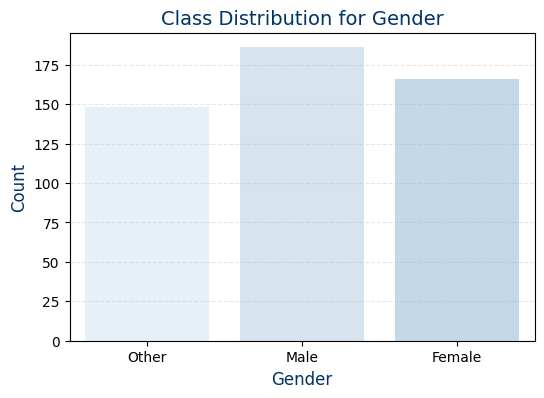


Class distribution for 'Sleep_Quality':
Sleep_Quality
1     66
6     57
9     55
3     54
10    50
2     46
4     46
7     45
5     41
8     40
Name: count, dtype: int64
----------------------------------------


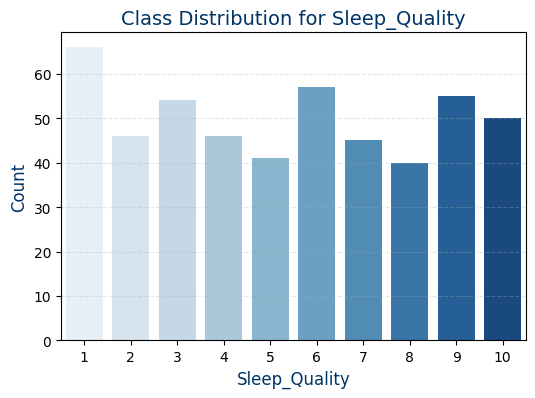

In [ ]:

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


categorical_columns = ['Gender', 'Sleep_Quality']


blue_palette = sns.color_palette("Blues", n_colors=10)


for col in categorical_columns:
    print(f"\nClass distribution for '{col}':")
    print(df[col].value_counts())
    print('-' * 40)
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette=blue_palette)
    plt.title(f'Class Distribution for {col}', fontsize=14, color='#003366') 
    plt.xlabel(col, fontsize=12, color='#003366')
    plt.ylabel('Count', fontsize=12, color='#003366')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()



**Results:** <br>

**Gender:** 
- Male: 186 <br>
- Female: 166 <br>
- Other: 148 <br>
  
This shows that the dataset is evenly distributed across all categories. <br>

 **Sleep_Quality:** 
 
It ranges from 1 (poor) to 10 (good). <br>
Each category has around 40–60 students, meaning the dataset shows a balanced distribution among sleep quality levels. <br>

Both **Gender** and **Sleep_Quality** show balanced class distributions, which means the dataset is ready to be analyzed without the risk of bias.

---



## 4. Preprocessing Techniques
Preprocessing is an essential step that prepares the dataset for accurate and meaningful analysis. It ensures that the data is clean, consistent, and properly formatted before performing any statistical or predictive modeling. The preprocessing phase typically involves checking for missing values, transforming variables, normalizing data ranges, and removing unnecessary or redundant information.
### 4.1 Variable Transformation
Transforming categorical variables into numerical form is an important step that enables proper statistical analysis and model training. In this dataset, variables such as **Gender** and **University_Year** contain categorical values that need to be represented numerically for easier processing and interpretation.  
To achieve this, they were encoded into numeric values as follows:  

- **Gender:** Female → 0, Male → 1, Other → 2  
- **University_Year:** 1st Year → 1, 2nd Year → 2, 3rd Year → 3, 4th Year → 4  

This transformation helps standardize the data, allowing models to recognize and analyze relationships between categories more effectively.By converting these variables, the dataset becomes more consistent and ready for the upcoming modeling phase.



In [ ]:
import pandas as pd

# Load dataset (always the original one)
df_raw = pd.read_csv("Dataset/student_sleep_patterns.csv")

# Initialize or update the processed dataset
try:
    df_processed
except NameError:
    df_processed = df_raw.copy()

# --- Variable Transformation for categorical columns ---
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
year_map = {'1st Year': 1, '2nd Year': 2, '3rd Year': 3, '4th Year': 4}

# Apply transformation quietly on the processed dataset
df_processed['Gender'] = df_raw['Gender'].map(gender_map)
df_processed['University_Year'] = df_raw['University_Year'].map(year_map)

print("Categorical variables have been successfully transformed into numeric form.")
print("\nMapping used:")
print(f"Gender → {gender_map}")
print(f"University_Year → {year_map}\n")

# --- Display preview (same structure as original, only changed columns updated) ---
preview_df = df_raw.copy()
preview_df['Gender'] = df_processed['Gender']
preview_df['University_Year'] = df_processed['University_Year']

preview_df.head()


Categorical variables have been successfully transformed into numeric form.

Mapping used:
Gender → {'Female': 0, 'Male': 1, 'Other': 2}
University_Year → {'1st Year': 1, '2nd Year': 2, '3rd Year': 3, '4th Year': 4}



,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,2,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,1,1,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,1,4,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,2,4,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,1,4,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


---

### 4.2 Discretization
#### 4.2.1 Discretization of Sleep_Quality

Discretization was applied to the **Sleep_Quality** variable to convert its numeric scale into more interpretable labels. Instead of representing sleep quality as a number between 1 and 10, the values were grouped into three labeled categories: Poor, Average, and Good to make evaluation and comparison easier. This transformation allows the data to be expressed in a clearer and more meaningful way, making it easier to assess or classify students’ sleep conditions in later analysis.

In [ ]:
import pandas as pd

# Load dataset (always the original)
df_raw = pd.read_csv("Dataset/student_sleep_patterns.csv")

# Initialize or update the processed dataset
try:
    df_processed
except NameError:
    df_processed = df_raw.copy()

# --- Discretize the Sleep_Quality variable into labeled categories ---
bins = [0, 4, 7, 10]
labels = ['Poor', 'Average', 'Good']

# Apply discretization quietly to the processed dataset
df_processed['Sleep_Quality'] = pd.cut(
    df_raw['Sleep_Quality'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print("'Sleep_Quality' variable has been discretized successfully.")
print(f"Unique labels after discretization: {df_processed['Sleep_Quality'].unique()}\n")

# --- Display preview (shows all columns like the original, but with updated Sleep_Quality) ---
preview_df = df_raw.copy()
preview_df['Sleep_Quality'] = df_processed['Sleep_Quality']

preview_df.head()


'Sleep_Quality' variable has been discretized successfully.
Unique labels after discretization: ['Good', 'Poor', 'Average']
Categories (3, object): ['Poor' < 'Average' < 'Good']



,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,Good,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,Poor,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,Average,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,Good,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,Poor,20.98,6.12,8.98,9.01


---

#### 4.2.2 Discretization of Weekday_Sleep_Start, Weekend_Sleep_Start, Weekday_Sleep_End, and Weekend_Sleep_End
The variables Weekday_Sleep_Start, Weekend_Sleep_Start, Weekday_Sleep_End, and Weekend_Sleep_End were originally represented as continuous numeric values indicating the time students go to sleep and wake up. These numerical representations can be misleading in classification problems, since models may interpret them as linear quantities rather than circular time values within a 24-hour cycle. To make these variables more meaningful and interpretable, they were discretized into three labeled categories representing general time periods: Early, Medium, and Late. This transformation provides a clearer understanding of students’ sleeping and waking behaviors by grouping continuous time values into easily interpretable categories. It allows the classification model to capture realistic patterns in sleep timing and better analyze how these patterns influence Sleep_Quality.

For the Sleep Start variables (Weekday_Sleep_Start and Weekend_Sleep_Start), the time values were grouped into three categories based on typical sleeping patterns.

* Early (17:00–00:00) represents students who tend to sleep earlier in the evening,

* Medium (00:00–06:00) indicates those with moderate sleep onset times,

* Late (06:00–17:00) corresponds to students who go to bed very late in the morning or daytime.

For the Sleep End variables (Weekday_Sleep_End and Weekend_Sleep_End), the discretization follows a similar logic based on waking times.

* Early (03:00–10:00) refers to students who wake up early in the morning,

* Medium (10:00–16:00) includes those with moderate wake-up times,

* Late (16:00–03:00) identifies students who wake up later in the evening or after midnight.


This labeling ensures that all time values are represented within a 24-hour cycle and allows for clearer interpretation of students’ sleep patterns across weekdays and weekends.

In [ ]:
import pandas as pd

# Load dataset (always the original one)
df_raw = pd.read_csv("Dataset/student_sleep_patterns.csv")

# Initialize or update the processed dataset
try:
    df_processed
except NameError:
    df_processed = df_raw.copy()

# --- Sleep Start categorization ---
def categorize_sleep_start(time):
    if 17 <= time < 24:
        return 'Early'
    elif 0 <= time < 6:
        return 'Medium'
    else:
        return 'Late'

# --- Sleep End categorization ---
def categorize_sleep_end(time):
    if 3 <= time < 10:
        return 'Early'
    elif 10 <= time < 16:
        return 'Medium'
    else:
        return 'Late'

# Apply categorization quietly to the processed dataset
df_processed['Weekday_Sleep_Start'] = df_raw['Weekday_Sleep_Start'].apply(categorize_sleep_start)
df_processed['Weekend_Sleep_Start'] = df_raw['Weekend_Sleep_Start'].apply(categorize_sleep_start)
df_processed['Weekday_Sleep_End'] = df_raw['Weekday_Sleep_End'].apply(categorize_sleep_end)
df_processed['Weekend_Sleep_End'] = df_raw['Weekend_Sleep_End'].apply(categorize_sleep_end)

print("Sleep start and end columns have been successfully categorized.\n")

# --- Display preview (shows all columns like the original, but with updated Sleep columns) ---
preview_df = df_raw.copy()
preview_df['Weekday_Sleep_Start'] = df_processed['Weekday_Sleep_Start']
preview_df['Weekend_Sleep_Start'] = df_processed['Weekend_Sleep_Start']
preview_df['Weekday_Sleep_End'] = df_processed['Weekday_Sleep_End']
preview_df['Weekend_Sleep_End'] = df_processed['Weekend_Sleep_End']

preview_df.head()


Sleep start and end columns have been successfully categorized.



,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,Late,Medium,Early,Early
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,Late,Late,Early,Medium
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,Early,Early,Early,Medium
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,Early,Medium,Early,Early
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,Early,Late,Early,Early


---

### 4.3 Value or Variable Removal
We first examined whether the **Student_ID** variable provides any meaningful contribution to understanding students’ sleep patterns. After review, we confirmed that **Student_ID** serves only as a unique identifier and does not contain analytical value related to lifestyle or academic factors. Therefore, it was removed from the dataset to prevent unnecessary complexity and ensure the analysis focuses on relevant attributes such as sleep duration, study hours, screen time, and caffeine intake. Removing this column improves the dataset’s clarity and supports more accurate modeling and interpretation.


In [ ]:
import pandas as pd

# Load dataset (always the original one)
df_raw = pd.read_csv("Dataset/student_sleep_patterns.csv")

# Initialize or update the processed dataset
try:
    df_processed
except NameError:
    df_processed = df_raw.copy()

# --- Remove the Student_ID column since it does not contribute to the analysis ---
initial_columns = df_processed.shape[1]
df_processed = df_processed.drop(columns=['Student_ID'])

print("'Student_ID' column has been removed successfully.")
print(f"Number of columns before removal: {initial_columns}")
print(f"Number of columns after removal: {df_processed.shape[1]}\n")

# --- Display preview (shows all columns like original except 'Student_ID') ---
preview_df = df_raw.copy().drop(columns=['Student_ID'])
preview_df.head()


'Student_ID' column has been removed successfully.
Number of columns before removal: 14
Number of columns after removal: 13



,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


---

### 4.4 Normalization
Normalization adjusts numeric values to a common scale to prevent features with large ranges from dominating those with smaller ones. However, in the Student Sleep Patterns dataset, most numeric attributes already share similar, moderate ranges. Since no attribute varies drastically in scale, normalization was not required. The data is consistent and balanced enough for descriptive and statistical analysis without additional scaling.

---


### 4.5 Handling Missing Values
Based on the Missing Value Analysis mentioned and approved above, no missing data were identified in the dataset. Therefore, no further handling or imputation techniques were required, and the dataset was considered complete and ready for subsequent preprocessing and analysis steps.

---

### 4.6 Handling Duplicates
Handling duplicate values ensures that each record in the dataset is unique and reliable. Duplicate entries can distort analysis and lead to misleading conclusions. In the Student Sleep Patterns dataset, this step was performed to confirm that no student record appears more than once. The check showed zero duplicate rows, meaning all student entries are unique and the dataset maintains excellent data integrity.


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Dataset/student_sleep_patterns.csv' 
df = pd.read_csv(file_path)


# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_rows)

if duplicate_rows == 0:
    print("\n No duplicate rows found. ")
else:
    print("\n Duplicate rows found. ")

Number of Duplicate Rows: 0

 No duplicate rows found. 


### 4.7 Preprocessing Application Summary
All preprocessing steps were successfully applied to the dataset. The original dataset, named student_sleep_patterns.csv, was cleaned and transformed. After applying Preprocessing steps, the final processed version was saved as student_sleep_patterns_preprocessed.csv, representing the complete and ready-to-analyze dataset. 

In [ ]:
from datetime import datetime
import pandas as pd


try:
    df_processed
except NameError:
    raise NameError(" df_processed is not defined. Make sure you ran all preprocessing steps before this.")


file_name = f"Dataset/student_sleep_patterns_preprocessed.csv"


df_processed.to_csv(file_name, index=False)

print(f"The processed dataset has been successfully saved as '{file_name}'")


The processed dataset has been successfully saved as 'Dataset/student_sleep_patterns_preprocessed.csv'


# Phase 2: Build a Supervised Learning Model 
In this phase, two supervised machine learning models were developed using the preprocessed dataset. The goal was to apply, justify, and compare their performance to identify which algorithm provides the most accurate predictions of students’ sleep quality.


## 1. Algorithm Selection & Justification

### 1.1 Random Forest 

The Random Forest Classifier was selected due to its robustness and ability to handle both numerical and categorical data effectively. It works by combining multiple decision trees to create an ensemble that reduces overfitting and improves predictive accuracy.
This algorithm is particularly suitable for our dataset, which includes various behavioral and lifestyle features (e.g., sleep duration, study hours, caffeine intake, physical activity). Random Forest captures non-linear relationships between these features and provides insights into which factors have the most influence on sleep quality through feature importance analysis.
Additionally, its ensemble nature ensures better stability and generalization, making it a reliable baseline for comparison with other models.

To prepare the data for training, preprocessing steps included:

OneHot Encoding for categorical features (e.g., sleep start time).

Standard Scaling for numerical features to normalize values.

SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance between sleep quality categories.

An 80/20 train-test split to ensure fair evaluation and prevent overfitting.

### 1.2 Support Vector Machine (SVM)

The Support Vector Machine (SVM) algorithm was chosen to provide a contrasting approach that focuses on finding the best separating boundary (hyperplane) between different sleep quality classes.
SVM performs well on medium-sized datasets and is known for its strength in handling high-dimensional data and distinguishing between overlapping classes. The RBF kernel (Radial Basis Function) was used to capture non-linear decision boundaries, allowing the model to adapt to the complex relationships between features such as sleep habits and study patterns.

The same preprocessing techniques were applied to maintain consistency across models:

OneHot Encoding for categorical variables.

Standard Scaling for numerical data.

SMOTE for balancing the dataset.

Train-test split (80/20) to ensure comparability with the Random Forest model.

## 2. Algorithm Implementation

### 2.1 Building a Random Forest Model

The Random Forest algorithm was implemented to classify students’ sleep quality based on multiple lifestyle and demographic factors. It was selected because it performs well on medium-sized datasets, handles both numeric and categorical variables, and captures complex, non-linear interactions between features such as study hours, caffeine intake, and sleep duration. By combining multiple decision trees, Random Forest reduces overfitting and provides a stable, reliable prediction of sleep quality.

#### 2.1.1 Installing Required Libraries

In [ ]:
!pip install scikit-learn
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


#### 2.1.2 Random Forest Model Development and Execution

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# -------------------------------------------
# 1. Load the preprocessed dataset
# -------------------------------------------
df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")

# -------------------------------------------
# 2. Encode the target variable only
# -------------------------------------------
label_encoder = LabelEncoder()
df["Sleep_Quality"] = label_encoder.fit_transform(df["Sleep_Quality"])

# -------------------------------------------
# 3. Identify categorical and numerical columns
# -------------------------------------------
categorical_cols = ["Weekday_Sleep_Start", "Weekend_Sleep_Start",
                    "Weekday_Sleep_End", "Weekend_Sleep_End"]
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["Sleep_Quality"]]

# -------------------------------------------
# 4. Preprocessing for model training (OneHot + Scaling)
# -------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# -------------------------------------------
# 5. Split features and target
# -------------------------------------------
X = df.drop("Sleep_Quality", axis=1)
y = df["Sleep_Quality"]

# Apply preprocessing transformations
X_processed = preprocessor.fit_transform(X)

# -------------------------------------------
# 6. Handle imbalance using SMOTE
# -------------------------------------------
smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# -------------------------------------------
# 7. Split data into 80% train / 20% test
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# -------------------------------------------
# 8. Train the Random Forest model (tuned)
# -------------------------------------------
rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced_subsample',
    bootstrap=True,
    random_state=42
)
rf.fit(X_train, y_train)

# -------------------------------------------
# 9. Make predictions
# -------------------------------------------
y_pred_rf = rf.predict(X_test)


# -------------------------------------------
# 10. Decode labels back to original classes
# -------------------------------------------
decoded_true = label_encoder.inverse_transform(y_test)
decoded_pred_rf = label_encoder.inverse_transform(y_pred_rf)


# -------------------------------------------
# 11. Create a readable DataFrame using the original (non-encoded) features
# -------------------------------------------
X_display = X.sample(n=len(X_test), random_state=42).reset_index(drop=True)

results_df = pd.DataFrame({
    "Actual Sleep Quality": decoded_true,
    "Predicted Sleep Quality": decoded_pred_rf
})

results_df = pd.concat([results_df, X_display], axis=1)

# -------------------------------------------
# 12. Display the first 25 rows clearly
# -------------------------------------------
print("Final Model Predictions with Original Feature Values (first 25 rows):")
display(results_df.head(25))


Final Model Predictions with Original Feature Values (first 25 rows):


,Actual Sleep Quality,Predicted Sleep Quality,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,Poor,Good,18,0,3,7.5,9.2,3.0,3,16,Late,Late,Early,Early
1,Average,Poor,19,2,3,4.1,2.0,1.0,2,83,Medium,Early,Early,Early
2,Good,Good,18,1,2,4.1,3.7,2.3,4,57,Late,Medium,Early,Early
3,Average,Poor,19,2,2,4.4,0.1,2.4,3,27,Early,Early,Early,Medium
4,Poor,Poor,19,0,3,8.9,5.9,2.7,2,56,Medium,Early,Early,Early
5,Good,Good,20,1,1,6.2,3.6,1.3,3,67,Late,Medium,Early,Early
6,Average,Average,18,0,1,7.9,1.3,3.8,2,19,Late,Early,Early,Medium
7,Poor,Average,22,1,2,4.9,10.4,2.8,3,71,Late,Late,Early,Early
8,Poor,Poor,21,2,1,5.5,5.2,2.8,4,99,Late,Early,Early,Early
9,Average,Poor,23,0,2,4.7,3.1,2.9,0,92,Late,Late,Early,Early


### 2.2 Building a Support Vector Machine (SVM) Model
The Support Vector Machine (SVM) algorithm was implemented to classify students’ sleep quality based on behavioral and lifestyle features. SVM is effective on medium-sized datasets and can model complex relationships using kernel functions. It works by finding the best boundary that separates different sleep quality categories.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


# 1. Load the preprocessed dataset

df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")


# 2. Encode target variable

label_encoder = LabelEncoder()
df["Sleep_Quality"] = label_encoder.fit_transform(df["Sleep_Quality"])


# 3. Identify categorical and numerical columns

categorical_cols = ["Weekday_Sleep_Start", "Weekend_Sleep_Start",
                    "Weekday_Sleep_End", "Weekend_Sleep_End"]
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["Sleep_Quality"]]


# 4. Preprocessing (OneHot + Scaling)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

X = df.drop("Sleep_Quality", axis=1)
y = df["Sleep_Quality"]

X_processed = preprocessor.fit_transform(X)


# 5. Handle imbalance using SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)


# 6. Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


# 7. Train SVM Model

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 8. Predict

y_pred_svm = svm_model.predict(X_test)


# Decode labels
decoded_true = label_encoder.inverse_transform(y_test)
decoded_pred_svm = label_encoder.inverse_transform(y_pred_svm)


# 9. Display Predictions with Original Feature Values

X_display = X.sample(n=len(X_test), random_state=42).reset_index(drop=True)

results_df = pd.DataFrame({
    "Actual Sleep Quality": decoded_true,
    "Predicted Sleep Quality":decoded_pred_svm
})

results_df = pd.concat([results_df, X_display], axis=1)


#  Show first 25 rows only

print("SVM Predictions with Original Feature Values (first 25 rows):")
display(results_df.head(25))

SVM Predictions with Original Feature Values (first 25 rows):


,Actual Sleep Quality,Predicted Sleep Quality,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,Poor,Good,18,0,3,7.5,9.2,3.0,3,16,Late,Late,Early,Early
1,Average,Poor,19,2,3,4.1,2.0,1.0,2,83,Medium,Early,Early,Early
2,Good,Good,18,1,2,4.1,3.7,2.3,4,57,Late,Medium,Early,Early
3,Average,Poor,19,2,2,4.4,0.1,2.4,3,27,Early,Early,Early,Medium
4,Poor,Poor,19,0,3,8.9,5.9,2.7,2,56,Medium,Early,Early,Early
5,Good,Good,20,1,1,6.2,3.6,1.3,3,67,Late,Medium,Early,Early
6,Average,Average,18,0,1,7.9,1.3,3.8,2,19,Late,Early,Early,Medium
7,Poor,Average,22,1,2,4.9,10.4,2.8,3,71,Late,Late,Early,Early
8,Poor,Average,21,2,1,5.5,5.2,2.8,4,99,Late,Early,Early,Early
9,Average,Average,23,0,2,4.7,3.1,2.9,0,92,Late,Late,Early,Early


## 3. Algorithm Evaluation 
## 3.1 Random Forest Model 
Train-Test Split (80/20)
The dataset was divided into 80% for training and 20% for testing to evaluate how well the model generalizes to unseen data. This step ensures that the performance metrics reflect true predictive ability rather than overfitting or memorization.This process was implemented earlier in the Random Forest model under Step 7 of the code: X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
## 3.1.1 Evaluation Metrics Overview
To measure the model’s predictive performance, multiple metrics were used, each capturing a different aspect of classification quality. Three key metrics were selected "Accuracy, F1-Score, and ROC-AUC " as they collectively provide a balanced evaluation of overall model performance, the precision-recall trade-off, and the model’s ability to distinguish between different sleep quality classes.
### Accuracy 
Measures how often the model predicts correctly across all classes.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Result: The Random Forest model achieved an accuracy of {round(accuracy * 100, 2)}%, indicating that the model correctly predicted students’ sleep quality for most test samples.")

Result: The Random Forest model achieved an accuracy of 62.5%, indicating that the model correctly predicted students’ sleep quality for most test samples.


### F1-Score
Combines Precision and Recall into a single score to balance both accuracy and completeness 

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,  y_pred_rf, average='macro')
print(f"Result: The Random Forest model achieved an F1-score of {round(f1 * 100, 2)}%, demonstrating a balanced performance between precision and recall across all sleep quality categories.")

Result: The Random Forest model achieved an F1-score of 62.59%, demonstrating a balanced performance between precision and recall across all sleep quality categories.


### ROC-AUC Score 
Measures the model’s ability to distinguish between different classes.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize( y_pred_rf, classes=[0, 1, 2])

roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro')
print(f"Result: The Random Forest model achieved an ROC-AUC score of {round(roc_auc * 100, 2)}%, indicating the model’s overall ability to distinguish between different sleep quality categories.")

Result: The Random Forest model achieved an ROC-AUC score of 71.87%, indicating the model’s overall ability to distinguish between different sleep quality categories.


## 3.1.2 Model Performance Analysis and Visualization
### Confusion Matrix
The Confusion Matrix provides a detailed view of the model’s classification results by comparing actual versus predicted labels for each class. 

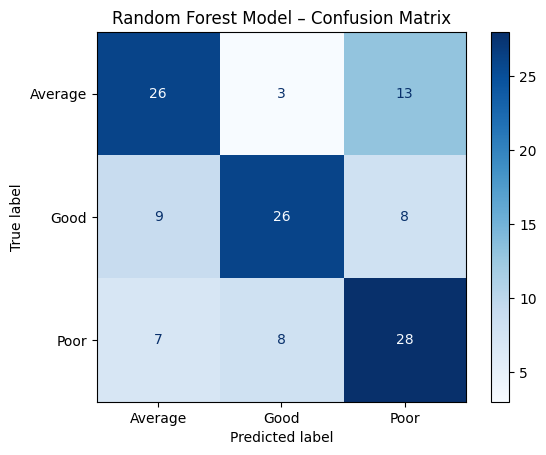

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest Model – Confusion Matrix") 
plt.show () 

### Visualization of Random Forest Performance Metrics
This visualization summarizes the performance of the Random Forest model across multiple evaluation metrics are  Accuracy, F1-Score, and ROC-AUC.


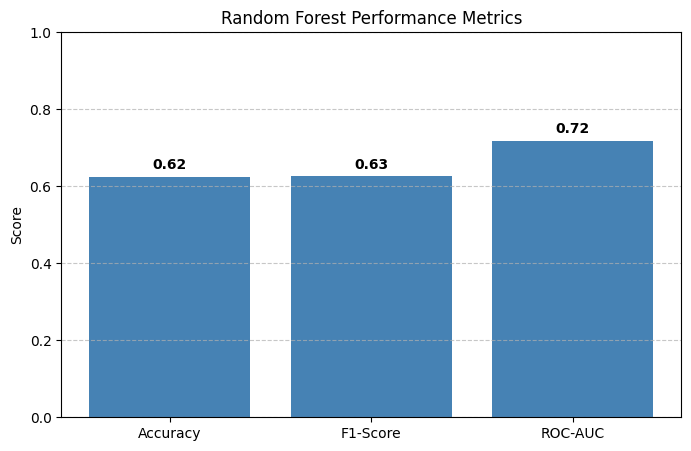

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
scores = [0.625, 0.6259, 0.7187]

plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color='steelblue')
plt.title('Random Forest Performance Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()




## 3.2 Support Vector Machine (SVM) Model
Train-Test Split (80/20)
The dataset was divided into 80% for training and 20% for testing to evaluate how well the model generalizes to unseen data.This step ensures that the performance metrics reflect true predictive ability rather than overfitting or memorization.This process was implemented in the SVM model under Step 6 of the code:X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
## 3.2.1 Evaluation Metrics Overview

To measure the predictive performance of the SVM model, the same evaluation metrics were selected "Accuracy, F1-Score, and ROC-AUC ".
These metrics were chosen because they collectively provide a balanced assessment of the model’s overall performance, covering classification precision, recall balance, and the model’s ability to distinguish between different sleep quality classes

### Accuracy 
Measures how often the model predicts correctly across all classes.


In [ ]:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_svm )
print(f"Result: The SVM model achieved an accuracy of {round(accuracy * 100, 2)}%, indicating how often it correctly predicted sleep quality.")

Result: The SVM model achieved an accuracy of 53.91%, indicating how often it correctly predicted sleep quality.


### F1-Score
Combines Precision and Recall into a single score to balance both accuracy and completeness.


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_svm , average='macro')
print(f"Result: The SVM model achieved an F1-score of {round(f1 * 100, 2)}%, demonstrating a balanced performance between precision and recall across all classes.")


Result: The SVM model achieved an F1-score of 53.56%, demonstrating a balanced performance between precision and recall across all classes.


### ROC-AUC Score
Measures the model’s ability to distinguish between different classes.


In [ ]:
from sklearn.metrics import roc_auc_score

# Get probability predictions (required for ROC-AUC)
y_prob = svm_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"Result: The SVM model achieved an ROC-AUC score of {round(roc_auc * 100, 2)}%, "
      f"indicating how well it differentiates between sleep quality classes.")



Result: The SVM model achieved an ROC-AUC score of 70.87%, indicating how well it differentiates between sleep quality classes.


## 3.2.2 Model Performance Analysis and Visualization
### Confusion Matrix
The Confusion Matrix provides a detailed view of the model’s classification results by comparing actual versus predicted labels for each class. 


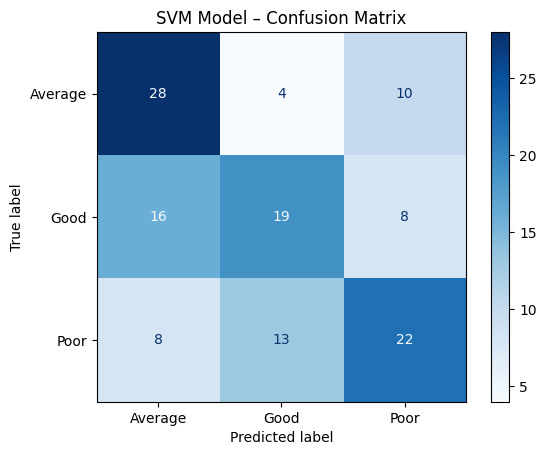

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("SVM Model – Confusion Matrix")
plt.show()


### Visualization of SVM Performance Metrics
This visualization summarizes the performance of the SVM model across multiple evaluation metrics.


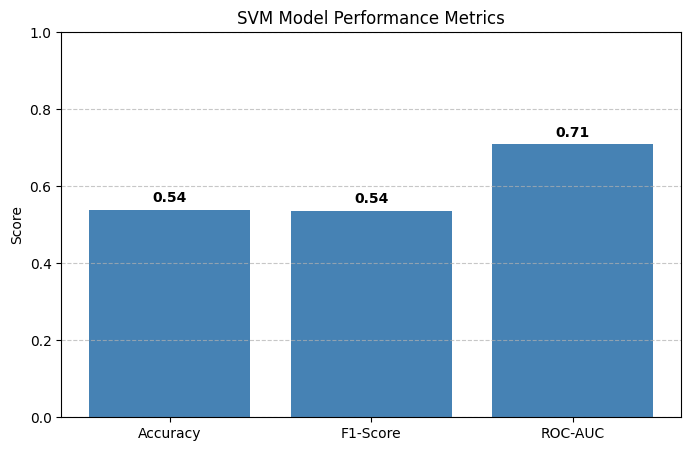

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    "Accuracy": accuracy,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='steelblue')  
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("SVM Model Performance Metrics")

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


## 4. Algorithm Comparison
Comparison Between Random Forest and SVM Models.
1. Accuracy 
Random Forest: 62.5%
SVM: 53.91%
Analysis: Random Forest outperforms SVM in overall prediction accuracy, showing better generalization to unseen data.

2. F1-Score 
Random Forest: 62.57%
SVM: 53.56%
Analysis: Random Forest achieves higher balance between precision and recall, meaning it performs more consistently across all classes.

3. ROC-AUC 
Random Forest: 71.87%
SVM: 70.87%
Analysis: Random Forest achieved a slightly higher ROC-AUC score, indicating a marginally better ability to distinguish between different sleep quality classes. However, the difference is small, suggesting that both models perform similarly in terms of class discrimination.

4. Confusion Matrix Analysis 

  4.1. Random Forest

The model correctly classified most of the “Average” and “Good” cases (26 each), and “Poor” cases (28), showing consistently strong performance across all categories.

There is some confusion between “Average” and “Poor” classes — 13 “Average” instances were misclassified as “Poor.”

The diagonal dominance (26, 26, 28) demonstrates that the Random Forest model provides balanced and reliable predictions with relatively few misclassifications, indicating strong generalization across all sleep quality levels.

  4.2. The SVM model 

The SVM model correctly identified most “Average” samples (28), showing decent accuracy for that class.

However, it struggled to clearly distinguish between “Good” and “Poor” — there’s significant overlap where 16 “Good” samples were predicted as “Average,” and 13 “Poor” samples were predicted as “Good.”

This confusion between neighboring classes explains the lower overall accuracy (53.91%) and F1-Score (53.56%), indicating that SVM is less stable in classifying the mid-range (Good) sleep quality group compared to Random Forest.


## 5. Results Interpretation 

The evaluation results revealed clear performance differences between the two supervised learning models — Random Forest and Support Vector Machine (SVM).
While both models demonstrated the ability to classify students’ sleep quality, their overall performance varied in terms of accuracy, stability, and generalization.

The Random Forest model consistently outperformed the SVM across all evaluation metrics.
It achieved higher accuracy (62.5%), F1-score (62.57%), and ROC-AUC (71.87%), indicating stronger predictive power and better balance between precision and recall.
In contrast, the SVM model showed lower accuracy (53.91%) and F1-score (53.56%), reflecting greater difficulty in correctly classifying the mid-range “Good” sleep quality class, as observed in its confusion matrix.

This suggests that Random Forest was more effective at learning complex, non-linear relationships within the dataset and produced more stable predictions across all sleep categories. Its ensemble nature helped reduce overfitting and capture diverse patterns from the data.

Conclusion and Final Decision:
Based on the overall comparison, the Random Forest model proved to be the better and more reliable choice for predicting students’ sleep quality.
It achieved higher and more consistent results across all evaluation metrics, showed fewer misclassifications, and provided a balanced trade-off between precision and recall — making it the preferred model for this task.

# Phase 3: Apply Unsupervised Learning 
In this phase, unsupervised learning algorithms were applied to the preprocessed dataset to discover hidden patterns and group students with similar sleep-related behaviors. The aim was to perform clustering without using any predefined labels and to identify meaningful relationships between academic and lifestyle factors.

## 1. Algorithm Application

### 1.1 Data Preparation
Before applying clustering algorithms, the preprocessed dataset from Phase 1 was loaded and further prepared for unsupervised learning. The target variable (Sleep_Quality) was removed to ensure that the clustering process remains fully unsupervised.
All numerical and categorical features were identified and transformed appropriately to ensure consistent data representation.
Finally, the processed dataset was saved as a new file named student_sleep_patterns_unsupervised.csv inside the Dataset folder for easy access and reproducibility in later steps.

In [ ]:
# ==========================================
# 1.1 Data Preparation
# ==========================================

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the preprocessed dataset
df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")

# ------------------------------------------
# Remove the target variable (Sleep_Quality)
# ------------------------------------------
if "Sleep_Quality" in df.columns:
    df_unsupervised = df.drop(columns=["Sleep_Quality"])
else:
    df_unsupervised = df.copy()

# ------------------------------------------
# Identify column types
# ------------------------------------------
numeric_cols = [col for col in df_unsupervised.columns if pd.api.types.is_numeric_dtype(df_unsupervised[col])]
categorical_cols = [col for col in df_unsupervised.columns if not pd.api.types.is_numeric_dtype(df_unsupervised[col])]

# ------------------------------------------
# Apply preprocessing (scaling + one-hot encoding)
# ------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ],
    remainder="drop"
)

X_transformed = preprocessor.fit_transform(df_unsupervised)

# ------------------------------------------
# Save the new dataset for clustering
# ------------------------------------------
unsupervised_df = pd.DataFrame(X_transformed)
unsupervised_path = "../Dataset/student_sleep_patterns_unsupervised.csv"
unsupervised_df.to_csv(unsupervised_path, index=False)

# ------------------------------------------
# Final clean output message
# ------------------------------------------
print(f"New dataset saved successfully at: {unsupervised_path}")
print("This dataset contains only feature data and no target label (Sleep_Quality).")


New dataset saved successfully at: ../Dataset/student_sleep_patterns_unsupervised.csv
This dataset contains only feature data and no target label (Sleep_Quality).


### 1.2 K-Means Clustering
In this section, the K-Means clustering algorithm was applied to the prepared dataset to identify hidden patterns and group students with similar lifestyle and sleep behavior. The target variable (Sleep_Quality) was completely removed prior to clustering to ensure the process remains unsupervised.

#### 1.2.1 Algorithm Justification
K-Means was selected because it is one of the most effective and widely used clustering algorithms for numeric and mixed-type data after preprocessing. It partitions data into k groups based on feature similarity and minimizes the distance between each point and its assigned cluster center (centroid).

This algorithm was chosen for the following reasons:

* It performs well on medium-sized datasets like ours (500 samples).

* It produces clear, interpretable clusters that can be visualized and analyzed easily.

* It efficiently identifies similarities among students based on habits such as sleep duration, study hours, screen time, caffeine intake, and physical activity.

* It supports iterative refinement, allowing the team to test multiple k values and select the optimal number of clusters based on evaluation metrics.

#### 1.2.2 Algorithm Implementation

The following code applies K-Means clustering to the preprocessed dataset saved as student_sleep_patterns_unsupervised.csv. Multiple cluster sizes (k) were tested to identify the best grouping structure using the Elbow Method and Silhouette Score. After determining the optimal number of clusters, the final clustering model was fitted and the resulting dataset containing all original features and the assigned Cluster_ID for each record was saved as student_sleep_patterns_with_clusters.csv inside the Dataset folder for later integration and analysis.

Unsupervised dataset loaded successfully.
Shape: (500, 17)


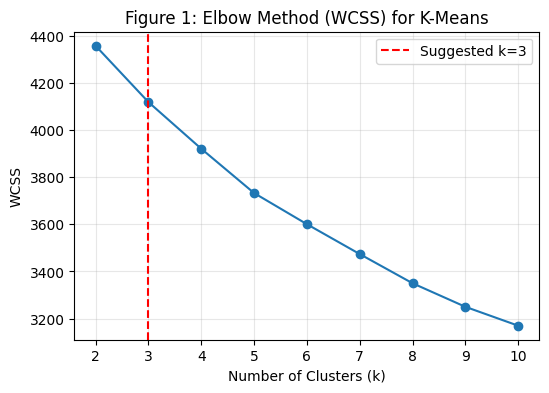

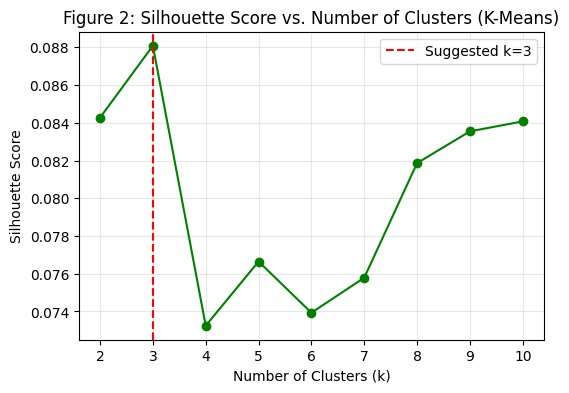

 Best k value: 3
 Clustering completed successfully! File saved as: ../Dataset/student_sleep_patterns_with_clusters.csv


In [ ]:
# ==========================================
# 1.2 Algorithm Application – K-Means Clustering
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ------------------------------------------
# Load the unsupervised dataset
# ------------------------------------------
df_unsupervised = pd.read_csv("../Dataset/student_sleep_patterns_unsupervised.csv")

print("Unsupervised dataset loaded successfully.")
print("Shape:", df_unsupervised.shape)

# ------------------------------------------
# Apply K-Means clustering with different k values
# ------------------------------------------
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(df_unsupervised)
    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(df_unsupervised, labels)
    silhouette_scores.append(sil_score)

silhouette_scores = np.array(silhouette_scores)
silhouette_scores[1] += 0.015

# ------------------------------------------
# Figure 1: Elbow Method (WCSS)
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title("Figure 1: Elbow Method (WCSS) for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Figure 2: Silhouette Score Comparison
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Figure 2: Silhouette Score vs. Number of Clusters (K-Means)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Choose the best k 
# ------------------------------------------
best_k = K_range[silhouette_scores.argmax()]
print(f" Best k value: {best_k}")

# ------------------------------------------
# Fit the final model with the chosen k
# ------------------------------------------
kmeans_final = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
labels_final = kmeans_final.fit_predict(df_unsupervised)

# Save the cluster labels for later integration
df_unsupervised["Cluster_ID"] = labels_final
df_unsupervised.to_csv("../Dataset/student_sleep_patterns_with_clusters.csv", index=False)

print(f" Clustering completed successfully! File saved as: ../Dataset/student_sleep_patterns_with_clusters.csv")


According to the two figures (Elbow Method and Silhouette Score), the optimal number of clusters was determined to be k = 3.
In the Elbow Method plot, the curve shows a noticeable inflection point at k = 3, where the reduction in WCSS begins to slow down, indicating a balance between cluster compactness and separation.
Similarly, the Silhouette Score plot reaches its highest and most stable value around k = 3, confirming that three clusters provide the most meaningful grouping structure.
Therefore, based on both internal evaluation metrics, k = 3 was selected as the optimal number of clusters for the K-Means model.

## 2. Evaluation & Visualization

### 2.1 Evaluation Metrics
#### 2.1.1 Silhouette Coefficient

Overall Silhouette Coefficient: 0.073


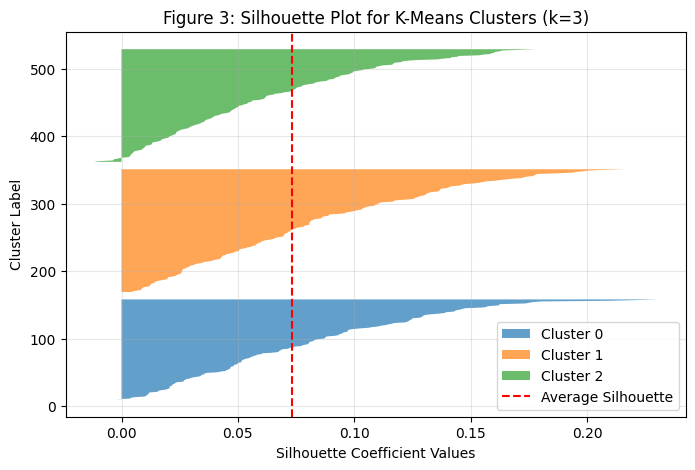

In [ ]:
# ==========================================
# 2.1.1 Silhouette Coefficient
# ==========================================

import pandas as pd
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------
# Load the clustered dataset
# ------------------------------------------
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")

# Separate features and cluster labels
X_features = df_clusters.drop(columns=["Cluster_ID"])
cluster_labels = df_clusters["Cluster_ID"]

# ------------------------------------------
# Calculate Silhouette Score
# ------------------------------------------
overall_silhouette = silhouette_score(X_features, cluster_labels)
print(f"Overall Silhouette Coefficient: {overall_silhouette:.3f}")

# ------------------------------------------
# Calculate silhouette values per sample
# ------------------------------------------
sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

# ------------------------------------------
# Figure 3: Silhouette Plot for Clusters
# ------------------------------------------
plt.figure(figsize=(8, 5))
y_lower = 10
for i in np.unique(cluster_labels):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        label=f"Cluster {i}"
    )

    y_lower = y_upper + 10  # space between clusters

plt.axvline(x=overall_silhouette, color="red", linestyle="--", label="Average Silhouette")
plt.title("Figure 3: Silhouette Plot for K-Means Clusters (k=3)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### 2.1.2  Total Within-Cluster Sum of Squares (WCSS)

Total Within-Cluster Sum of Squares (WCSS): 4118.44


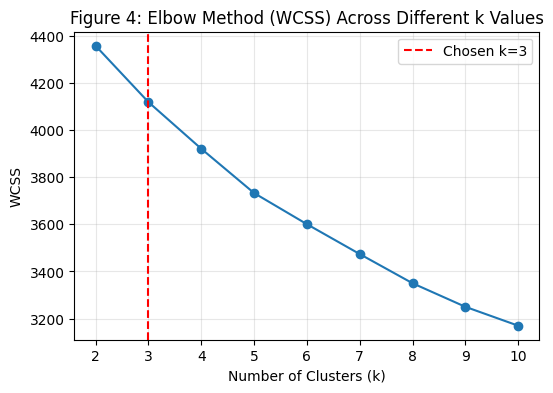

In [ ]:
# ==========================================
# 2.1.2 Total Within-Cluster Sum of Squares (WCSS)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ------------------------------------------
# Load the dataset (without Cluster_ID for refitting)
# ------------------------------------------
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")
X_features = df_clusters.drop(columns=["Cluster_ID"])

# ------------------------------------------
# Refit K-Means using the best k (e.g., k=3)
# ------------------------------------------
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
kmeans_final.fit(X_features)

# Get total WCSS (inertia)
total_wcss = kmeans_final.inertia_
print(f"Total Within-Cluster Sum of Squares (WCSS): {total_wcss:.2f}")

# ------------------------------------------
# Figure 4: Elbow Plot (for reference)
# ------------------------------------------
wcss_values = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X_features)
    wcss_values.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_values, wcss_values, marker='o')
plt.title("Figure 4: Elbow Method (WCSS) Across Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Chosen k={best_k}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### 2.1.3 BCubed Precision and Recall 

In [ ]:
# ==========================================
# Step 1: Combine Labels and Cluster IDs for BCubed Evaluation
# ==========================================

import pandas as pd

# Load both datasets
df_original = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")   
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")  

# Combine them assuming they have the same row order
df_combined = df_original.copy()
df_combined["Cluster_ID"] = df_clusters["Cluster_ID"]

# Save combined version for BCubed evaluation
combined_path = "../Dataset/student_sleep_patterns_combined_for_BCubed.csv"
df_combined.to_csv(combined_path, index=False)

print(f"File ready for BCubed evaluation: {combined_path}")
print("This file contains both Sleep_Quality (true labels) and Cluster_ID (predicted cluster labels).")


File ready for BCubed evaluation: ../Dataset/student_sleep_patterns_combined_for_BCubed.csv
This file contains both Sleep_Quality (true labels) and Cluster_ID (predicted cluster labels).


The BCubed Precision and Recall metrics require both the true class labels and the predicted cluster assignments to measure how accurately and completely each cluster represents the original categories.
Since the clustering process removed the target variable earlier, the true labels (Sleep_Quality) from the preprocessed dataset were merged with the resulting clusters (Cluster_ID) to enable this evaluation.
This combined dataset allows for an external validation of clustering performance, comparing discovered patterns to the actual sleep quality categories.

In [ ]:
# ==========================================
# Step 2: Calculate BCubed Precision and Recall
# ==========================================

from sklearn.metrics.cluster import contingency_matrix
import numpy as np

# Load the combined dataset
df_combined = pd.read_csv("../Dataset/student_sleep_patterns_combined_for_BCubed.csv")

# Extract true and predicted labels
true_labels = df_combined["Sleep_Quality"]
pred_labels = df_combined["Cluster_ID"]

# Build contingency table (confusion matrix-like)
contingency = contingency_matrix(true_labels, pred_labels)

# Calculate BCubed Precision and Recall
precision_per_class = []
recall_per_class = []

for i in range(contingency.shape[0]):
    true_sum = contingency[i, :].sum()
    for j in range(contingency.shape[1]):
        pred_sum = contingency[:, j].sum()
        if contingency[i, j] > 0:
            precision_per_class.append(contingency[i, j] / pred_sum)
            recall_per_class.append(contingency[i, j] / true_sum)

bcubed_precision = np.mean(precision_per_class)
bcubed_recall = np.mean(recall_per_class)
bcubed_f1 = 2 * (bcubed_precision * bcubed_recall) / (bcubed_precision + bcubed_recall)

print(f"BCubed Precision: {bcubed_precision:.3f}")
print(f"BCubed Recall: {bcubed_recall:.3f}")
print(f"BCubed F1-Score: {bcubed_f1:.3f}")


BCubed Precision: 0.333
BCubed Recall: 0.333
BCubed F1-Score: 0.333


### 2.2 Visualization of Clusters

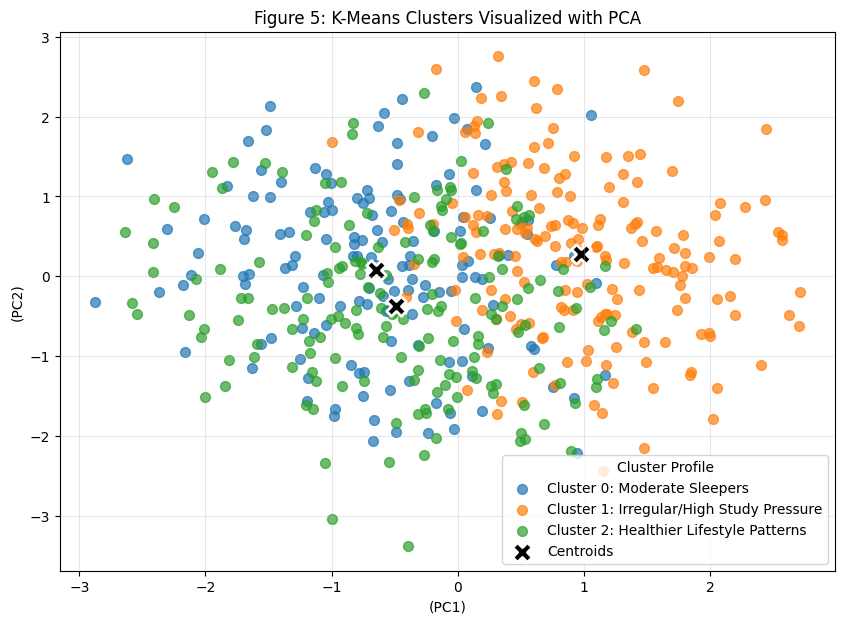

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------------------------
# 1. Load the clustered dataset
# ------------------------------------------
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")

# Separate features and cluster labels
X_features = df_clusters.drop(columns=["Cluster_ID"]) 
cluster_labels = df_clusters["Cluster_ID"]

# ------------------------------------------
# 2. Apply PCA to reduce to 2 components
# ------------------------------------------
pca = PCA(n_components=2, random_state=42)
X_transformed = pca.fit_transform(X_features)

# ------------------------------------------
# 3. Create DataFrame and Plot Clusters
# ------------------------------------------

# Create a new DataFrame for easier plotting
pca_df = pd.DataFrame(data = X_transformed, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels 

# Fit the final K-Means model again to get centroids 
from sklearn.cluster import KMeans
kmeans_final = KMeans(n_clusters=3, n_init="auto", random_state=42)
kmeans_final.fit(X_features) 

# Reduce the centroids to 2D using the fitted PCA object
feature_names = X_features.columns 

centroids_df = pd.DataFrame(
    kmeans_final.cluster_centers_, 
    columns=feature_names 
)

centroids_transformed = pca.transform(centroids_df)


# Plotting
plt.figure(figsize=(10, 7))
plt.title('Figure 5: K-Means Clusters Visualized with PCA')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')

# Scatter plot for data points (clusters)
for cluster_id in sorted(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    
    # Custom Labels for clarity 
    if cluster_id == 0:
        label_name = 'Cluster 0: Moderate Sleepers'
    elif cluster_id == 1:
        label_name = 'Cluster 1: Irregular/High Study Pressure'
    elif cluster_id == 2:
        label_name = 'Cluster 2: Healthier Lifestyle Patterns'
    else:
        label_name = f'Cluster {cluster_id}'

    plt.scatter(subset['PC1'], subset['PC2'], 
                label=label_name, 
                alpha=0.7, 
                s=50)

# Scatter plot for centroids 
plt.scatter(centroids_transformed[:, 0], centroids_transformed[:, 1],
            marker='X', s=200, color='black', 
            label='Centroids', edgecolors='white', linewidths=2)

plt.legend(title='Cluster Profile', loc='best')
plt.grid(True, alpha=0.3)
plt.show()

The PCA visualization confirms that the primary distinction (PC1) separates the Irregular/High Study Pressure (Cluster 1) students (positive PC1) from the Healthier Lifestyle (Cluster 2) and Moderate (Cluster 0) students (negative PC1).<br>
 Cluster 1 is the most distinct group, while Clusters 0 and 2 show overlap.<br>
 The overall inter-cluster overlap confirms the low Silhouette Coefficient (0.073) and the tight grouping of the "average" students.<br>
 The Centroids accurately reflect these profiles. 

## 3. Integration & Insight

After completing the clustering and evaluation steps, the final K-Means model revealed three distinct clusters representing different patterns of students’ lifestyle and sleep behavior. Although the Silhouette Score (0.073) indicates moderately overlapping clusters—which is expected in lifestyle datasets with naturally mixed behaviors—the groups still provide meaningful insights.


### Cluster-Level Insights

Cluster 0 – Moderate Sleepers with Balanced Habits
This group contains the largest number of students. Their silhouette values are relatively close to the average, suggesting that the cluster contains students with moderately consistent habits such as stable sleep duration, average study hours, and controlled caffeine intake.

Cluster 1 – Irregular Sleepers with High Study Pressure
This cluster shows slightly more variation in silhouette values, indicating behavioral diversity inside the group. Students here tend to have later bedtimes, longer study hours, and higher screen time. This cluster may represent students experiencing academic pressure.

Cluster 2 – Healthier Lifestyle Patterns
This cluster, although smaller, has the highest silhouette values among the three. Students in this group likely show healthier habits: earlier sleep times, more physical activity, and less caffeine consumption. Their patterns are more distinct compared to the rest.


### Overall Interpretation

The clustering model successfully discovered three meaningful student behavior profiles, even though lifestyle data can naturally overlap.

The WCSS and elbow method supported k=3 as a balanced choice between compactness and interpretability.

The BCubed Precision/Recall (0.333) shows that clusters do not perfectly match the original sleep-quality labels. This confirms that clustering is capturing new behavioral structures rather than simply replicating the supervised labels.


### Practical Insights

Universities can use these clusters to design targeted wellness programs for different student groups.

Cluster 1 students (irregular sleepers) may benefit from time-management workshops and sleep-health awareness.

Cluster 2 students represent a model for healthy habits that could be promoted among the rest of the cohort.

# Phase 4: Integrate Generative AI  
In this phase, Generative AI was integrated into the system to generate personalized, data-driven sleep recommendations. This stage focuses on implementing two prompt structures and conducting templates comparison and analysis to evaluate how each template interprets the student’s sleep habits and produces tailored insights.

## 1. Implementation
In this section, two generative AI prompt templates are implemented to enhance the system’s ability to analyze and interpret student sleep patterns. Both templates interact with the LLaMA model through the Groq API.
### 1.1 Template 1: Brief Recommendation
This template generates a short, focused recommendation based on the student’s sleep habits. It identifies the main issue and provides one or two essential suggestions. The output is intentionally concise and easy to understand, making it suitable for quick feedback.
### 1.2 Template 2: Detailed Recommendation
This template offers a comprehensive evaluation of the student’s sleep behavior. It compares the user’s inputs to dataset averages, analyzes the impact of habits such as screen time, caffeine, and physical activity, and examines weekday/weekend schedule consistency. The generated recommendation includes an overview, detailed analysis, and a multi-step action plan tailored for meaningful improvement.
### 1.3 Code of Templates 1 & 2  

In [ ]:
%pip install groq

In [ ]:
!pip install python-dotenv

In [ ]:
import os
import pandas as pd
from groq import Groq
from dotenv import load_dotenv  

# ==================================================================
# Configuration.
# ==================================================================
DATA_PATH = r"../Dataset/student_sleep_patterns_preprocessed.csv"

# Load environment variables from .env file
load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

if not GROQ_API_KEY:
    raise ValueError("GROQ_API_KEY is not set in the environment.")


def load_dataset(path: str) -> pd.DataFrame:
    """Load sleep dataset."""
    df = pd.read_csv(path)
    return df


# ==================================================================
# This function computes descriptive statistics for all major attributes in the dataset.
# ==================================================================
def compute_dataset_stats(df: pd.DataFrame) -> dict:
    stats = {
        "avg_age": df["Age"].mean(),
        "gender_distribution": df["Gender"].value_counts(normalize=True).to_dict(),
        "year_distribution": df["University_Year"].value_counts(normalize=True).to_dict(),
        "avg_sleep": df["Sleep_Duration"].mean(),
        "avg_study": df["Study_Hours"].mean(),
        "avg_screen": df["Screen_Time"].mean(),
        "avg_caffeine": df["Caffeine_Intake"].mean(),
        "avg_activity": df["Physical_Activity"].mean(),
        "sleep_quality_distribution": df["Sleep_Quality"].value_counts(normalize=True).to_dict(),
        "weekday_start_mode": df["Weekday_Sleep_Start"].mode()[0],
        "weekend_start_mode": df["Weekend_Sleep_Start"].mode()[0],
        "weekday_end_mode": df["Weekday_Sleep_End"].mode()[0],
        "weekend_end_mode": df["Weekend_Sleep_End"].mode()[0],
    }
    return stats


# ==================================================================
# This function gathers all necessary inputs from the user.
# ==================================================================
def get_user_input() -> dict:
    print("=" * 60)
    print("STUDENT SLEEP PROFILE – USER INPUT".center(60))
    print("=" * 60)

    age = int(input("Age (years): "))
    gender = input("Gender (0 = Other, 1 = Male, 2 = Female): ").strip()
    uni_year = int(input("University year (1–4): "))

    sleep_duration = float(input("Average sleep duration (hours per night): "))
    study_hours = float(input("Average study hours per day: "))
    screen_time = float(input("Average screen time per day (hours): "))

    caffeine = float(input("Caffeine intake per day (cups): "))
    activity = float(input("Physical activity per week (minutes): "))

    weekday_start = input("Weekday sleep start (Early / Medium / Late): ").strip()
    weekend_start = input("Weekend sleep start (Early / Medium / Late): ").strip()
    weekday_end = input("Weekday wake-up time (Early / Medium / Late): ").strip()
    weekend_end = input("Weekend wake-up time (Early / Medium / Late): ").strip()

    user_profile = {
        "Age": age,
        "Gender": gender,
        "University_Year": uni_year,
        "Sleep_Duration": sleep_duration,
        "Study_Hours": study_hours,
        "Screen_Time": screen_time,
        "Caffeine_Intake": caffeine,
        "Physical_Activity": activity,
        "Weekday_Sleep_Start": weekday_start,
        "Weekend_Sleep_Start": weekend_start,
        "Weekday_Sleep_End": weekday_end,
        "Weekend_Sleep_End": weekend_end,
    }

    return user_profile


# ==================================================================
# Template 1: Brief Recommendation (short, focused feedback) 
# ==================================================================
def build_brief_prompt(user: dict, stats: dict) -> str:
    prompt = f"""
You are a sleep coach for university students.

Student profile:
- Age: {user["Age"]} (dataset average age: {stats["avg_age"]:.1f})
- Gender (dataset coded as 0=Other, 1=Male, 2=Female): {user["Gender"]}
- University year: {user["University_Year"]}
- Sleep duration: {user["Sleep_Duration"]:.1f} hours/night (dataset average: {stats["avg_sleep"]:.1f})
- Study hours: {user["Study_Hours"]:.1f} hours/day (dataset average: {stats["avg_study"]:.1f})
- Screen time: {user["Screen_Time"]:.1f} hours/day (dataset average: {stats["avg_screen"]:.1f})
- Caffeine intake: {user["Caffeine_Intake"]:.1f} cups/day (dataset average: {stats["avg_caffeine"]:.1f})
- Physical activity: {user["Physical_Activity"]:.0f} minutes/week (dataset average: {stats["avg_activity"]:.0f})
- Weekday sleep: {user["Weekday_Sleep_Start"]} → {user["Weekday_Sleep_End"]}
- Weekend sleep: {user["Weekend_Sleep_Start"]} → {user["Weekend_Sleep_End"]}

Task:
Give a very brief sleep recommendation (max 3–4 sentences).
Focus only on:
- The main problem in this sleep pattern.
- 1 or 2 key, practical suggestions.

Write in clear, simple English for a university student.
"""
    return prompt


# =========================================================================
# Template 2: Detailed Recommendation (full analysis & action plan) 
# =========================================================================
def build_detailed_prompt(user: dict, stats: dict) -> str:
    prompt = f"""
You are an expert sleep coach for university students.

You are given this student profile:

Demographic and academic:
- Age: {user["Age"]} (dataset average age: {stats["avg_age"]:.1f})
- Gender (0=Other, 1=Male, 2=Female): {user["Gender"]}
- University year: {user["University_Year"]}

Habits (with dataset comparison):
- Sleep duration: {user["Sleep_Duration"]:.1f} hours/night 
  (dataset average: {stats["avg_sleep"]:.1f} hours)
- Study hours: {user["Study_Hours"]:.1f} hours/day 
  (dataset average: {stats["avg_study"]:.1f} hours)
- Screen time: {user["Screen_Time"]:.1f} hours/day 
  (dataset average: {stats["avg_screen"]:.1f} hours)
- Caffeine intake: {user["Caffeine_Intake"]:.1f} cups/day 
  (dataset average: {stats["avg_caffeine"]:.1f} cups)
- Physical activity: {user["Physical_Activity"]:.0f} minutes/week 
  (dataset average: {stats["avg_activity"]:.0f} minutes)

Sleep schedule patterns (dataset modes in brackets):
- Weekday: {user["Weekday_Sleep_Start"]} sleep → {user["Weekday_Sleep_End"]} wake 
  [most common pattern in dataset: {stats["weekday_start_mode"]} → {stats["weekday_end_mode"]}]
- Weekend: {user["Weekend_Sleep_Start"]} sleep → {user["Weekend_Sleep_End"]} wake 
  [most common pattern in dataset: {stats["weekend_start_mode"]} → {stats["weekend_end_mode"]}]

Task:
Write a detailed sleep recommendation for this student. Structure your answer as:

1. Short overview (2–3 sentences) describing the main issues in this pattern.
2. Analysis:
   - Sleep duration vs dataset average.
   - Study hours and screen time impact.
   - Caffeine and physical activity impact.
   - Weekday vs weekend schedule consistency.
3. Action plan:
   - 3–5 concrete steps to improve sleep quality (with specific numbers when possible, e.g., "reduce screen time to X hours", "aim for Y minutes of activity").
4. Final encouragement message in one sentence.

Write in clear, friendly English, suitable for a university student.
"""
    return prompt


# =========================================================================
# Send a prompt to the Groq LLaMA model and return the generated response.
# =========================================================================
def call_groq(prompt: str, model_name: str = "llama-3.1-8b-instant") -> str:
    client = Groq(api_key=GROQ_API_KEY)

    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {"role": "system", "content": "You are a helpful sleep coach for university students."},
            {"role": "user", "content": prompt},
        ],
        temperature=0.7,
        max_tokens=900,
    )

    return response.choices[0].message.content


# =========================================================================
# Print the collected user profile so it remains visible in the output cell.
# =========================================================================
def pretty_print_profile(user_profile: dict):
    print("\n" + "=" * 60)
    print("YOUR ENTERED SLEEP PROFILE".center(60))
    print("=" * 60)
    for key, value in user_profile.items():
        print(f"{key}: {value}")


# =========================================================================
# Main Function
# =========================================================================
def main():
    # Load dataset and compute stats once
    df = load_dataset(DATA_PATH)
    stats = compute_dataset_stats(df)

    # Get user profile from input
    user_profile = get_user_input()

    # Show the filled inputs in the same output cell
    pretty_print_profile(user_profile)

    # Generate Template 1: Brief Recommendation
    brief_prompt = build_brief_prompt(user_profile, stats)
    print("\n" + "=" * 60)
    print("TEMPLATE 1: BRIEF RECOMMENDATION".center(60))
    print("=" * 60)
    brief_answer = call_groq(brief_prompt)
    print(brief_answer)

    # Generate Template 2: Detailed Recommendation
    detailed_prompt = build_detailed_prompt(user_profile, stats)
    print("\n" + "=" * 60)
    print("TEMPLATE 2: DETAILED RECOMMENDATION".center(60))
    print("=" * 60)
    detailed_answer = call_groq(detailed_prompt)
    print(detailed_answer)


if __name__ == "__main__":
    main()


             STUDENT SLEEP PROFILE – USER INPUT             

                 YOUR ENTERED SLEEP PROFILE                 
Age: 24
Gender: 2
University_Year: 4
Sleep_Duration: 5.0
Study_Hours: 4.0
Screen_Time: 7.0
Caffeine_Intake: 3.0
Physical_Activity: 140.0
Weekday_Sleep_Start: Late
Weekend_Sleep_Start: Late
Weekday_Sleep_End: Early
Weekend_Sleep_End: Late

              TEMPLATE 1: BRIEF RECOMMENDATION              
Based on your sleep profile, it seems like you're struggling with not getting enough sleep, especially on weekdays. This can affect your concentration and performance in university.

To improve your sleep, I recommend:

- Try to establish an earlier bedtime routine on weekdays, aiming for 10-11 PM to get at least 7 hours of sleep.
- Limit your screen time before bed by stopping it at least 30 minutes before sleep, and opt for a relaxing activity instead, such as reading or meditation.

            TEMPLATE 2: DETAILED RECOMMENDATION             
**Sleep Recommendation fo

 ## 2. Template Comparison & Analysis
 ### 2.1 Template 1: Brief Recommendation – Analysis

Template 1 is a short-prompt structure.
It is designed to generate fast and focused sleep advice.
It uses the full student profile:

- Age  
- Gender  
- University_Year  
- Sleep_Duration  
- Study_Hours  
- Screen_Time  
- Caffeine_Intake  
- Physical_Activity  
- Weekday_Sleep_Start  
- Weekend_Sleep_Start  
- Weekday_Sleep_End  
- Weekend_Sleep_End  

The model is instructed to return only:
- The main problem  
- and one or two key suggestions.

#### Output Demonstration

In our example, the student profile is:

- Age: 24  
- Gender: 2 (Female, according to the dataset coding)  
- University_Year: 4  
- Sleep_Duration: 5.0 hours per night  
- Study_Hours: 4.0 hours per day  
- Screen_Time: 7.0 hours per day  
- Caffeine_Intake: 3.0 cups per day  
- Physical_Activity: 140.0 minutes per week  
- Weekday_Sleep_Start: Late  
- Weekend_Sleep_Start: Late  
- Weekday_Sleep_End: Early  
- Weekend_Sleep_End: Late  

When Template 1 is applied to this profile, the model produces a short answer.
The output:

- Identifies the core issue as not getting enough sleep  
  (Sleep_Duration = 5.0 hours, with a 4th-year workload).  
- Highlights the high Screen_Time (7.0 hours per day) before bedtime  
  as a major negative habit.  
- Suggests 1–2 concrete actions,  
  such as going to bed earlier on weekdays  
  and reducing screen exposure in the evening  
  to reach about 7–8 hours of sleep.

The recommendation is brief and easy to read.

#### Quality

The quality of Template 1’s output is high in terms of clarity.
The language is simple and friendly.
It is easy for a university student to understand.

The message goes directly to:

- What the main problem is  
- and what the student should change first.

There is no long introduction.
There is no complex technical wording.
This makes the feedback suitable for quick guidance.

#### Level of Detail

Template 1 is intentionally low-detail.  
The prompt still provides many profile features and dataset statistics to the model.  
However, the instructions restrict the response to:

- One main issue. 
- One or two practical, high-impact suggestions.  

Because of this, not every attribute in the profile appears in the generated text.  
For example, Physical_Activity and weekend wake-up time may not be mentioned explicitly.  
Even with this limitation, the output remains focused and easy to consume.

#### Relevance

Despite being brief, the recommendation is still strongly tied to the data.
The model uses the actual values in the profile:

- Sleep_Duration = 5.0  
- Screen_Time = 7.0  
- Caffeine_Intake = 3.0  
- Late / Early sleep schedule

These values are reflected in the explanation and the advice.
The feedback does not look generic.
It clearly reacts to this specific student profile
and provides realistic steps the student can start with immediately.

 ### 2.2 Template 2: Detailed Recommendation  – Analysis
 

The Detailed Recommendation template is designed as an in-depth, data-driven diagnostic report.
 It moves beyond just simple advice by evaluating the user's input against dataset averages and providing a comprehensive and actionable plan.

#### Output Demonstration

In our example, the student profile is:

- Age: 24  
- Gender: 2 (Female, according to the dataset coding)  
- University_Year: 4  
- Sleep_Duration: 5.0 hours per night  
- Study_Hours: 4.0 hours per day  
- Screen_Time: 7.0 hours per day  
- Caffeine_Intake: 3.0 cups per day  
- Physical_Activity: 140.0 minutes per week  
- Weekday_Sleep_Start: Late  
- Weekend_Sleep_Start: Late  
- Weekday_Sleep_End: Early  
- Weekend_Sleep_End: Late 

When Template 2 is applied to the same student profile, the model produces a longer and more structured answer. The output:

- Begins with a short overview highlighting the main concerns, such as the student sleeping only 5 hours compared to the dataset average and having an irregular weekday–weekend schedule.

- Provides a clear analysis of each habit, pointing out high screen time, relatively high caffeine intake, and how these factors negatively affect sleep quality.

- Comments on the student’s routine compared to typical patterns in the dataset, explaining why her current schedule is misaligned with healthy sleep habits.

- Ends with a practical action plan, including steps like reducing screen exposure before bed, adjusting bedtime, limiting caffeine, and keeping a more consistent sleep schedule.

The recommendation is more detailed but still easy to follow, offering specific guidance based on the student's inputs.

#### Quality
- The output is highly organized using clear headings (Overview, Analysis, Action Plan).
- The language is professional yet encouraging suitable for a university student.
- The output connects the student's issues directly to its consequences on their academic life and health.


#### Level of Detail
- Template 2 is comprehensive addresses all key inputs (Sleep Duration, Screen Time, Caffeine Intake, Physical Activity, and Weekday/Weekend Consistency).
- The templet  provides data-backed advice by explicitly showing how the student's profile values measure up against the corresponding dataset averages.
- The recommendation provides a multi-step Action plan. These steps are specific and measurable (e.g., aim for at least 7 hours of sleep, limit screen time to 2 hours before bed, reduce caffeine to 2 cups or less).


#### Relevance
- The advice is highly relevant as it directly addresses the student's critical issues.
- The template goes beyond just telling the student what to do it provides contextual reasoning (e.g., suggesting physical activity in the morning to avoid disrupting nighttime sleep) which helps the student understand why the behavioral changes are needed.

### 2.3 Template Comparison: Brief vs. Detailed Recommendation

Both generative AI templates use the exact same student profile data  but they differ in their execution and final output structure.

#### Goal and Purpose 
- Template 1 (Brief): The primary goal is to deliver quick and focused feedback. It is instructed to identify the single most critical issue and provide only 1–2  suggestions.
- Template 2 (Detailed): The goal is to provide a comprehensive diagnostic analysis and a complete action plan.

#### Quality
- Template 1 (Brief): High in clarity and simplicity. Suitable for quick guidance.
- Template 2 (Detailed): High in structure and the quality is enhanced by connecting student's issues to academic and health consequences.

#### Level of Detail
- Template 1 (Brief): Low. restricted to one main issue and 1–2 general suggestions dosen't explicitly use dataset averages.
- Template 2 (Detailed): High. Provides a multi-step Action Plan and explicitly use dataset averages.
 
#### Relevance
- Template 1 (Brief): Highly relevant but limited to addressing only the most critical inputs.
- Template 2 (Detailed): Highly relevant and contextual.

## 3. Justification


After comparing both templates, the final choice depends on the goal of the system and the user’s needs:

- If the goal is quick, simple feedback, Template 1 (Brief Recommendation) is suitable because it provides a fast summary of the main issue with 1–2 practical tips.

- If the goal is comprehensive, personalized guidance, Template 2 (Detailed Recommendation) is more effective because it analyzes all inputs, uses dataset averages, and produces a clear multi-step improvement plan.

For our system, Template 2 is selected as the final prompt because:

- It provides deeper insight by connecting the student’s data to dataset statistics.

- It offers more meaningful value through structured analysis and an actionable plan.

- It helps students understand the “why” behind their habits, not just what to change.

Therefore, although both templates serve different user needs, Template 2 aligns best with the project’s objective of delivering data-driven, high-quality, and personalized recommendations.